# Chapter 4 - Inferences with Gaussians

In [1]:
import pyjags
from pjbcmassistant import model_handler
from pjbcmassistant import sample_handler


## 4.1 - Inferring a mean and standard deviation

note: we'd like data, eg, n, to be able to do its calculating...
and we'd like for comments to be comments, even in the model spec.
this should be doable with another split, and the use of eval?

In [11]:
spec = """
model:
Gaussian.txt

settings:
chains = 3
samples = 1000
thinning = 0
burnin = 1000

data:
x = [1.1, 1.9, 2.3, 1.8]
n = len(x) 

sample:
mu
sigma

"""

modelbuddy = model_handler(spec)

model = pyjags.Model(**modelbuddy.definition())
samples = model.sample(**modelbuddy.sample_rules())

samplebuddy = sample_handler(samples)

adapting: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00


In [12]:

samplebuddy.summary()

,mean,std dev,median,mode,HPD,95CI
var,,,,,,
mu,1.779181,0.850969,1.767259,-7.22393,"[-0.452, 3.252]","[0.312, 3.159]"
sigma,1.117714,1.205400,0.763462,3.72075,"[0.207, 9.834]","[0.318, 5.412]"


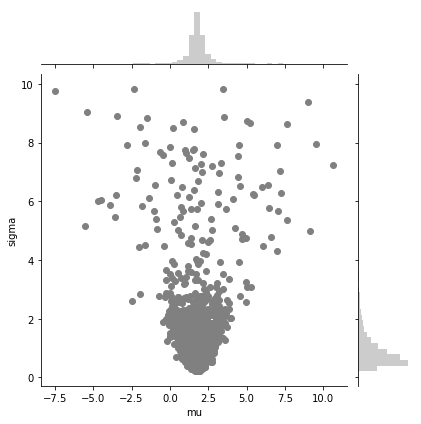

In [14]:
samplebuddy.vizjoint('mu','sigma')

## 4.2 - The Seven Scientists

In [6]:
spec = """
model:
SevenScientists.txt

settings:
chains = 3
samples = 1000
thinning = 0
burnin = 1000

data:
x = [-27.020,3.570,8.191,9.898,9.603,9.945,10.056]
n = len(x)

sample:
mu
sigma

"""

modelbuddy = model_handler(spec)

model = pyjags.Model(**modelbuddy.definition())
samples = model.sample(**modelbuddy.sample_rules())

samplebuddy = sample_handler(samples)

sampling: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00


In [7]:
samplebuddy.summary()

,mean,std dev,median,mode,HPD,95CI
var,,,,,,
mu,9.897379,0.235190,9.925684,4.414960,"[9.447, 10.186]","[9.541, 10.106]"
sigma_0,251.432692,2451.694514,53.840679,7632.363486,"[10.207, 596.527]","[16.316, 1081.216]"
sigma_1,47.441921,426.170094,9.070517,1774.985472,"[1.661, 94.183]","[2.841, 182.186]"
sigma_2,13.815934,145.434081,2.598551,419.787373,"[0.053, 33.632]","[0.757, 59.882]"
sigma_3,0.664816,3.950307,0.142145,11.741143,"[0.014, 1.866]","[0.026, 3.721]"
sigma_4,3.385903,94.789165,0.442250,284.828905,"[0.012, 5.19]","[0.076, 9.562]"
sigma_5,1.653610,43.053367,0.137870,103.635133,"[0.015, 2.318]","[0.026, 3.806]"
sigma_6,1.324623,12.567410,0.214366,57.712908,"[0.014, 3.658]","[0.035, 7.161]"


## 4.3 - Repeated measurement of IQ

In [8]:
spec = """
model:
IQ.txt

settings:
chains = 3
samples = 100000
thinning = 0
burnin = 1000

data:
x = [[90,95,100],[105,110,115],[150,155,160]]
n, m = np.shape(x)

# this is an ugly way to do this, because we're "calling" a
# module (numpy) that we haven't actually imported... I'm sure there's
# a smart alternative, but I won't dwell on it just yet.

sample:
mu
sigma

"""

modelbuddy = model_handler(spec)

# modelbuddy.data['x'] = [[90,95,100],[105,110,115],[150,155,160]]

model = pyjags.Model(**modelbuddy.definition())
samples = model.sample(**modelbuddy.sample_rules())

samplebuddy = sample_handler(samples)

adapting: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 300000 of 300000, elapsed 0:00:02, remaining 0:00:00


In [9]:
samplebuddy.summary()

,mean,std dev,median,mode,HPD,95CI
var,,,,,,
mu_0,94.999007,4.103052,95.006339,40.385535,"[86.963, 103.42]","[86.836, 103.158]"
mu_1,110.001555,4.066466,109.993373,69.135026,"[101.817, 118.205]","[101.88, 118.155]"
mu_2,155.002677,4.092071,154.994018,88.005765,"[146.705, 163.244]","[146.876, 163.166]"
sigma,6.518103,2.749245,5.873998,41.110213,"[2.879, 11.634]","[3.41, 13.392]"
